In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
sns.set()
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Using TensorFlow backend.


In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')


def drop_columns(df, columns):
    df.drop(columns, axis=1,inplace=True)
    return df

def fill_NA(df, columns, value):
    for c in columns:
        df[c].fillna(value,inplace=True)
    return df

def get_dummies_for_category_columns(df):
    categoryColumns = df.columns[df.dtypes=="object"] 
    df = pd.concat([df,pd.get_dummies(df[categoryColumns])],axis=1)
    df.drop(categoryColumns, axis=1, inplace=True)
    return df

def drop_huge_buildings(df):
    # Drop huge buildings
    df=df[df["1stFlrSF"]<4000]
    df=df[df["LotArea"]<50000]
    df=df[df["BsmtFullBath"]<3] # why would you even have 3 bath in the basement?
    return df

def set_type(df, column, type_name):
    df[column] = df[column].astype(type_name)
    return df

def drop_non_correlated_columns(df, min_corr):
    salesPriceCorr = df.corr()['SalePrice']
    good_corr = np.logical_or(salesPriceCorr<-min_corr, salesPriceCorr>min_corr)
    onlyCorrelatedColumns = salesPriceCorr[good_corr]
    df = df[onlyCorrelatedColumns.index]
    return df

def log_tranform(df, column):
    df['log'+column] = np.log(df[column])
    return df;
    

In [3]:
# high NAN count
high_nan_columns = ['Alley','Electrical','FireplaceQu','PoolQC','Fence','MiscFeature','LotFrontage','GarageYrBlt']
no_variety_columns = ['Utilities','Condition2','Heating','PavedDrive','Street','BsmtCond','GarageFinish','GarageCond','GarageFinish','RoofMatl']
columnsToFillNone= ['MasVnrType','GarageQual', 'GarageType','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtQual']
columnsToFillZero= ['MasVnrArea',"BsmtFinSF1","BsmtFinSF2","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageCars","GarageArea" ] 
ignoreUncorrelatedRate = 0.2

def preprocess(df):
   return (df.pipe(drop_columns, columns=high_nan_columns) # high number of NA values 
   .pipe(drop_columns, columns=no_variety_columns) # no variety
   .pipe(drop_columns, columns=["Id","BsmtUnfSF", "BedroomAbvGr"])## drop Garbage
   .pipe(fill_NA, columns=columnsToFillNone, value='None') # 
   .pipe(fill_NA, columns=columnsToFillZero, value=0) # 
   .pipe(get_dummies_for_category_columns)
   .pipe(log_tranform, 'LotArea') 
   .pipe(set_type, 'MasVnrArea','int64')
)

df1 = preprocess(df1).pipe(drop_huge_buildings).pipe(drop_non_correlated_columns, min_corr=ignoreUncorrelatedRate) 
df2_ids=df2['Id']
df2 = preprocess(df2)

In [4]:
corr=df1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

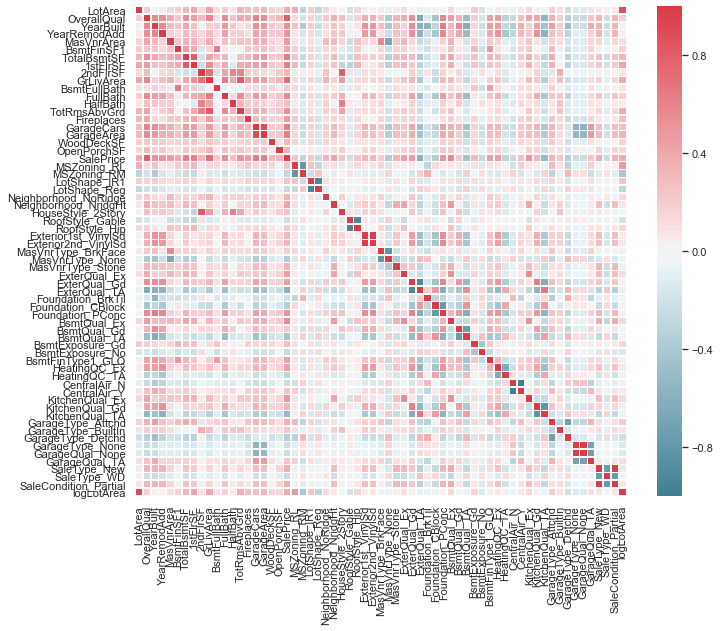

In [5]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": 1})

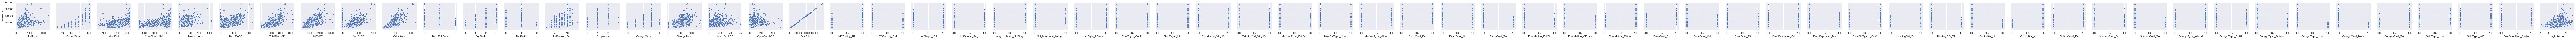

In [6]:
sns.pairplot(df1,y_vars=["SalePrice"], x_vars=df1.columns)


In [7]:
y = df1['SalePrice']
# X = df[['LotArea']]

X = df1.drop('SalePrice', axis=1)


In [8]:

# define model
model = Sequential()
model.add(Dense(25, input_dim=len(X.columns), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.
Train on 1158 samples, validate on 290 samples
Epoch 1/1000
1158/1158 [==============================] - 1s 477us/step - loss: 111.3321 - val_loss: 98.9486
Epoch 2/1000
1158/1158 [==============================] - 1s 507us/step - loss: 90.4445 - val_loss: 81.7903
Epoch 3/1000
1158/1158 [==============================] - 1s 528us/step - loss: 76.4171 - val_loss: 70.9519
Epoch 4/1000
1158/1158 [==============================] - 1s 499us/step - loss: 67.4183 - val_loss: 63.5956
Epoch 5/1000
1158/1158 [==============================] - 1s 508us/step - loss: 61.0101 - val_loss: 58.0737
Epoch 6/1000
1158/1158 [==============================] - 0s 174us/step - loss: 56.0474 - val_loss: 53.6607
Epoch 7/1000
1158/1158 [==============================] - 0s 58us/step - loss: 52.0015 - val_loss: 49.9856
Epoch 8/1000
1158/1158 [==============================] - 0s 57us/step - loss: 48.5881 - val_loss: 46.8396
Epoch 9/1000
1158/1158 [==================

1158/1158 [==============================] - 0s 46us/step - loss: 6.8145 - val_loss: 6.6780
Epoch 75/1000
1158/1158 [==============================] - 0s 47us/step - loss: 6.6724 - val_loss: 6.5377
Epoch 76/1000
1158/1158 [==============================] - 0s 66us/step - loss: 6.5334 - val_loss: 6.4011
Epoch 77/1000
1158/1158 [==============================] - 0s 46us/step - loss: 6.3975 - val_loss: 6.2673
Epoch 78/1000
1158/1158 [==============================] - 0s 73us/step - loss: 6.2648 - val_loss: 6.1363
Epoch 79/1000
1158/1158 [==============================] - 0s 59us/step - loss: 6.1350 - val_loss: 6.0087
Epoch 80/1000
1158/1158 [==============================] - 0s 48us/step - loss: 6.0079 - val_loss: 5.8834
Epoch 81/1000
1158/1158 [==============================] - 0s 46us/step - loss: 5.8837 - val_loss: 5.7610
Epoch 82/1000
1158/1158 [==============================] - 0s 49us/step - loss: 5.7623 - val_loss: 5.6413
Epoch 83/1000
1158/1158 [==============================] - 0

1158/1158 [==============================] - 0s 48us/step - loss: 1.3057 - val_loss: 1.2506
Epoch 151/1000
1158/1158 [==============================] - 0s 48us/step - loss: 1.2742 - val_loss: 1.2198
Epoch 152/1000
1158/1158 [==============================] - 0s 47us/step - loss: 1.2434 - val_loss: 1.1893
Epoch 153/1000
1158/1158 [==============================] - 0s 45us/step - loss: 1.2130 - val_loss: 1.1595
Epoch 154/1000
1158/1158 [==============================] - 0s 47us/step - loss: 1.1833 - val_loss: 1.1304
Epoch 155/1000
1158/1158 [==============================] - 0s 47us/step - loss: 1.1543 - val_loss: 1.1019
Epoch 156/1000
1158/1158 [==============================] - 0s 44us/step - loss: 1.1258 - val_loss: 1.0740
Epoch 157/1000
1158/1158 [==============================] - 0s 44us/step - loss: 1.0979 - val_loss: 1.0465
Epoch 158/1000
1158/1158 [==============================] - 0s 45us/step - loss: 1.0704 - val_loss: 1.0195
Epoch 159/1000
1158/1158 [==========================

1158/1158 [==============================] - 0s 56us/step - loss: 0.1578 - val_loss: 0.1313
Epoch 227/1000
1158/1158 [==============================] - 0s 45us/step - loss: 0.1537 - val_loss: 0.1273
Epoch 228/1000
1158/1158 [==============================] - 0s 45us/step - loss: 0.1497 - val_loss: 0.1236
Epoch 229/1000
1158/1158 [==============================] - 0s 48us/step - loss: 0.1459 - val_loss: 0.1200
Epoch 230/1000
1158/1158 [==============================] - 0s 47us/step - loss: 0.1422 - val_loss: 0.1166
Epoch 231/1000
1158/1158 [==============================] - 0s 57us/step - loss: 0.1388 - val_loss: 0.1134
Epoch 232/1000
1158/1158 [==============================] - ETA: 0s - loss: 0.135 - 1s 461us/step - loss: 0.1354 - val_loss: 0.1102
Epoch 233/1000
1158/1158 [==============================] - 0s 292us/step - loss: 0.1322 - val_loss: 0.1073
Epoch 234/1000
1158/1158 [==============================] - 0s 330us/step - loss: 0.1292 - val_loss: 0.1044
Epoch 235/1000
1158/1158 

1158/1158 [==============================] - 0s 420us/step - loss: 0.0641 - val_loss: 0.0486
Epoch 303/1000
1158/1158 [==============================] - 0s 310us/step - loss: 0.0638 - val_loss: 0.0483
Epoch 304/1000
1158/1158 [==============================] - 0s 155us/step - loss: 0.0635 - val_loss: 0.0481
Epoch 305/1000
1158/1158 [==============================] - 0s 165us/step - loss: 0.0631 - val_loss: 0.0479
Epoch 306/1000
1158/1158 [==============================] - 0s 252us/step - loss: 0.0628 - val_loss: 0.0477
Epoch 307/1000
1158/1158 [==============================] - 0s 95us/step - loss: 0.0625 - val_loss: 0.0475
Epoch 308/1000
1158/1158 [==============================] - 0s 145us/step - loss: 0.0622 - val_loss: 0.0473
Epoch 309/1000
1158/1158 [==============================] - 0s 138us/step - loss: 0.0618 - val_loss: 0.0471
Epoch 310/1000
1158/1158 [==============================] - 1s 456us/step - loss: 0.0615 - val_loss: 0.0468
Epoch 311/1000
1158/1158 [==================

1158/1158 [==============================] - 0s 72us/step - loss: 0.0418 - val_loss: 0.0347
Epoch 379/1000
1158/1158 [==============================] - 0s 71us/step - loss: 0.0416 - val_loss: 0.0346
Epoch 380/1000
1158/1158 [==============================] - 0s 258us/step - loss: 0.0414 - val_loss: 0.0345
Epoch 381/1000
1158/1158 [==============================] - 0s 173us/step - loss: 0.0412 - val_loss: 0.0344
Epoch 382/1000
1158/1158 [==============================] - 0s 199us/step - loss: 0.0410 - val_loss: 0.0343
Epoch 383/1000
1158/1158 [==============================] - 0s 171us/step - loss: 0.0408 - val_loss: 0.0342
Epoch 384/1000
1158/1158 [==============================] - 0s 263us/step - loss: 0.0406 - val_loss: 0.0341
Epoch 385/1000
1158/1158 [==============================] - 0s 233us/step - loss: 0.0404 - val_loss: 0.0340
Epoch 386/1000
1158/1158 [==============================] - 0s 88us/step - loss: 0.0402 - val_loss: 0.0339
Epoch 387/1000
1158/1158 [====================

1158/1158 [==============================] - 0s 48us/step - loss: 0.0307 - val_loss: 0.0285
Epoch 455/1000
1158/1158 [==============================] - 0s 64us/step - loss: 0.0306 - val_loss: 0.0284
Epoch 456/1000
1158/1158 [==============================] - 0s 47us/step - loss: 0.0305 - val_loss: 0.0283
Epoch 457/1000
1158/1158 [==============================] - 0s 49us/step - loss: 0.0303 - val_loss: 0.0283
Epoch 458/1000
1158/1158 [==============================] - 0s 264us/step - loss: 0.0302 - val_loss: 0.0282
Epoch 459/1000
1158/1158 [==============================] - 1s 462us/step - loss: 0.0301 - val_loss: 0.0281
Epoch 460/1000
1158/1158 [==============================] - 0s 312us/step - loss: 0.0300 - val_loss: 0.0280
Epoch 461/1000
1158/1158 [==============================] - 0s 234us/step - loss: 0.0299 - val_loss: 0.0280
Epoch 462/1000
1158/1158 [==============================] - 0s 67us/step - loss: 0.0298 - val_loss: 0.0279
Epoch 463/1000
1158/1158 [======================

1158/1158 [==============================] - 0s 121us/step - loss: 0.0239 - val_loss: 0.0250
Epoch 531/1000
1158/1158 [==============================] - 0s 54us/step - loss: 0.0239 - val_loss: 0.0249
Epoch 532/1000
1158/1158 [==============================] - 0s 66us/step - loss: 0.0238 - val_loss: 0.0249
Epoch 533/1000
1158/1158 [==============================] - 0s 72us/step - loss: 0.0238 - val_loss: 0.0249
Epoch 534/1000
1158/1158 [==============================] - 0s 77us/step - loss: 0.0237 - val_loss: 0.0249
Epoch 535/1000
1158/1158 [==============================] - 0s 68us/step - loss: 0.0236 - val_loss: 0.0249
Epoch 536/1000
1158/1158 [==============================] - 0s 55us/step - loss: 0.0236 - val_loss: 0.0249
Epoch 537/1000
1158/1158 [==============================] - 0s 75us/step - loss: 0.0235 - val_loss: 0.0248
Epoch 538/1000
1158/1158 [==============================] - 0s 262us/step - loss: 0.0234 - val_loss: 0.0248
Epoch 539/1000
1158/1158 [========================

1158/1158 [==============================] - 0s 58us/step - loss: 0.0207 - val_loss: 0.0242
Epoch 607/1000
1158/1158 [==============================] - 0s 54us/step - loss: 0.0207 - val_loss: 0.0242
Epoch 608/1000
1158/1158 [==============================] - 0s 78us/step - loss: 0.0207 - val_loss: 0.0242
Epoch 609/1000
1158/1158 [==============================] - 0s 59us/step - loss: 0.0207 - val_loss: 0.0242
Epoch 610/1000
1158/1158 [==============================] - 0s 56us/step - loss: 0.0207 - val_loss: 0.0242
Epoch 611/1000
1158/1158 [==============================] - 0s 74us/step - loss: 0.0206 - val_loss: 0.0242
Epoch 612/1000
1158/1158 [==============================] - 0s 184us/step - loss: 0.0206 - val_loss: 0.0242
Epoch 613/1000
1158/1158 [==============================] - 0s 144us/step - loss: 0.0206 - val_loss: 0.0242
Epoch 614/1000
1158/1158 [==============================] - 0s 222us/step - loss: 0.0205 - val_loss: 0.0241
Epoch 615/1000
1158/1158 [=======================

1158/1158 [==============================] - 0s 91us/step - loss: 0.0193 - val_loss: 0.0239
Epoch 683/1000
1158/1158 [==============================] - 0s 170us/step - loss: 0.0193 - val_loss: 0.0239
Epoch 684/1000
1158/1158 [==============================] - 0s 336us/step - loss: 0.0193 - val_loss: 0.0239
Epoch 685/1000
1158/1158 [==============================] - 0s 352us/step - loss: 0.0193 - val_loss: 0.0239
Epoch 686/1000
1158/1158 [==============================] - 1s 510us/step - loss: 0.0193 - val_loss: 0.0239
Epoch 687/1000
1158/1158 [==============================] - 0s 191us/step - loss: 0.0192 - val_loss: 0.0239
Epoch 688/1000
1158/1158 [==============================] - 0s 392us/step - loss: 0.0192 - val_loss: 0.0239
Epoch 689/1000
1158/1158 [==============================] - 0s 301us/step - loss: 0.0192 - val_loss: 0.0239
Epoch 690/1000
1158/1158 [==============================] - 0s 58us/step - loss: 0.0192 - val_loss: 0.0239
Epoch 691/1000
1158/1158 [===================

1158/1158 [==============================] - 0s 205us/step - loss: 0.0186 - val_loss: 0.0237
Epoch 759/1000
1158/1158 [==============================] - 0s 231us/step - loss: 0.0186 - val_loss: 0.0237
Epoch 760/1000
1158/1158 [==============================] - 0s 359us/step - loss: 0.0186 - val_loss: 0.0237
Epoch 761/1000
1158/1158 [==============================] - 0s 275us/step - loss: 0.0185 - val_loss: 0.0237
Epoch 762/1000
1158/1158 [==============================] - 0s 197us/step - loss: 0.0185 - val_loss: 0.0237
Epoch 763/1000
1158/1158 [==============================] - 0s 99us/step - loss: 0.0185 - val_loss: 0.0237
Epoch 764/1000
1158/1158 [==============================] - 0s 49us/step - loss: 0.0185 - val_loss: 0.0237
Epoch 765/1000
1158/1158 [==============================] - 0s 58us/step - loss: 0.0185 - val_loss: 0.0237
Epoch 766/1000
1158/1158 [==============================] - 0s 63us/step - loss: 0.0185 - val_loss: 0.0237
Epoch 767/1000
1158/1158 [=====================

1158/1158 [==============================] - 0s 296us/step - loss: 0.0181 - val_loss: 0.0236
Epoch 835/1000
1158/1158 [==============================] - 0s 50us/step - loss: 0.0181 - val_loss: 0.0236
Epoch 836/1000
1158/1158 [==============================] - 0s 72us/step - loss: 0.0181 - val_loss: 0.0236
Epoch 837/1000
1158/1158 [==============================] - 0s 58us/step - loss: 0.0181 - val_loss: 0.0236
Epoch 838/1000
1158/1158 [==============================] - 0s 62us/step - loss: 0.0181 - val_loss: 0.0236
Epoch 839/1000
1158/1158 [==============================] - 0s 55us/step - loss: 0.0181 - val_loss: 0.0236
Epoch 840/1000
1158/1158 [==============================] - 0s 77us/step - loss: 0.0181 - val_loss: 0.0236
Epoch 841/1000
1158/1158 [==============================] - 0s 73us/step - loss: 0.0181 - val_loss: 0.0236
Epoch 842/1000
1158/1158 [==============================] - 0s 140us/step - loss: 0.0181 - val_loss: 0.0236
Epoch 843/1000
1158/1158 [========================

1158/1158 [==============================] - 0s 108us/step - loss: 0.0178 - val_loss: 0.0235
Epoch 911/1000
1158/1158 [==============================] - 0s 83us/step - loss: 0.0178 - val_loss: 0.0235
Epoch 912/1000
1158/1158 [==============================] - 0s 74us/step - loss: 0.0178 - val_loss: 0.0235
Epoch 913/1000
1158/1158 [==============================] - 0s 47us/step - loss: 0.0178 - val_loss: 0.0235
Epoch 914/1000
1158/1158 [==============================] - 0s 47us/step - loss: 0.0178 - val_loss: 0.0235
Epoch 915/1000
1158/1158 [==============================] - 0s 48us/step - loss: 0.0178 - val_loss: 0.0235
Epoch 916/1000
1158/1158 [==============================] - 0s 49us/step - loss: 0.0178 - val_loss: 0.0235
Epoch 917/1000
1158/1158 [==============================] - 0s 46us/step - loss: 0.0177 - val_loss: 0.0235
Epoch 918/1000
1158/1158 [==============================] - 0s 48us/step - loss: 0.0177 - val_loss: 0.0235
Epoch 919/1000
1158/1158 [=========================

1158/1158 [==============================] - 0s 145us/step - loss: 0.0175 - val_loss: 0.0235
Epoch 987/1000
1158/1158 [==============================] - 0s 208us/step - loss: 0.0175 - val_loss: 0.0235
Epoch 988/1000
1158/1158 [==============================] - 0s 254us/step - loss: 0.0175 - val_loss: 0.0235
Epoch 989/1000
1158/1158 [==============================] - 0s 235us/step - loss: 0.0175 - val_loss: 0.0235
Epoch 990/1000
1158/1158 [==============================] - 0s 274us/step - loss: 0.0175 - val_loss: 0.0235
Epoch 991/1000
1158/1158 [==============================] - 0s 219us/step - loss: 0.0175 - val_loss: 0.0235
Epoch 992/1000
1158/1158 [==============================] - 0s 61us/step - loss: 0.0175 - val_loss: 0.0235
Epoch 993/1000
1158/1158 [==============================] - 0s 46us/step - loss: 0.0175 - val_loss: 0.0235
Epoch 994/1000
1158/1158 [==============================] - 0s 47us/step - loss: 0.0175 - val_loss: 0.0234
Epoch 995/1000
1158/1158 [====================

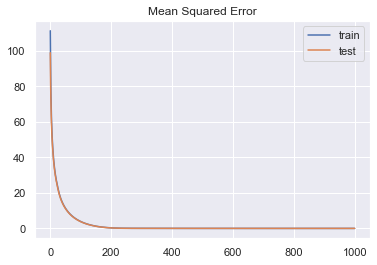

In [9]:


trainX, testX, trainy, testy = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1)
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler.fit(trainX)
trainX= scaler.transform(trainX)
testX= scaler.transform(testX)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=1000, verbose=1)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
# pyplot.plot(history.history['acc'], label='train_acc')
# pyplot.plot(history.history['val_acc'], label='test_acc')
pyplot.legend()
pyplot.show()

In [10]:
df2.head()


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,logLotArea
0,20,11622,5,6,1961,1961,0,468.0,144.0,882.0,896,0,0,896,0.0,0.0,1,0,1,5,0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0

In [11]:
df2.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,logLotArea
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.00

In [12]:
dfX=scaler.transform(df2[X.columns])

In [13]:
result = model.predict(dfX)

In [14]:
dfR = pd.DataFrame(df2_ids)
dfR['SalePrice']=result

In [15]:
dfR.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,176922.875000
std,421.321334,72148.914062
min,1461.000000,42400.566406
25%,1825.500000,127807.535156
50%,2190.000000,160484.515625
75%,2554.500000,206919.273438
max,2919.000000,632270.812500


In [16]:
dfR.head()

,Id,SalePrice
0,1461,104055.984375
1,1462,159454.656250
2,1463,189516.890625
3,1464,189525.531250
4,1465,179403.703125


In [17]:
dfR.to_csv('predictions.csv',index = None, header=True)

In [18]:
df5 = pd.read_csv('test.csv')



In [19]:
df5['SaleType']

0          WD
1          WD
2          WD
3          WD
4          WD
5          WD
6          WD
7          WD
8          WD
9          WD
10         WD
11        COD
12         WD
13         WD
14         WD
15        New
16        New
17         WD
18         WD
19         WD
20         WD
21         WD
22         WD
23         WD
24         WD
25         WD
26         WD
27         WD
28        New
29         WD
30         WD
31         WD
32         WD
33         WD
34         WD
35         WD
36         WD
37      ConLD
38         WD
39         WD
40         WD
41         WD
42        New
43         WD
44         WD
45         WD
46         WD
47         WD
48         WD
49         WD
50      ConLD
51         WD
52        COD
53        Oth
54         WD
55         WD
56         WD
57         WD
58         WD
59         WD
60         WD
61         WD
62         WD
63         WD
64         WD
65         WD
66         WD
67         WD
68         WD
69         WD
70        COD
71    

In [29]:
predicted = model.predict(X)

In [30]:
df1['PredictedPrice']=predicted
df1['Delta'] = df1['SalePrice']-df1['PredictedPrice']


In [31]:
len(predicted)

1448

In [28]:
len(df1)

1448

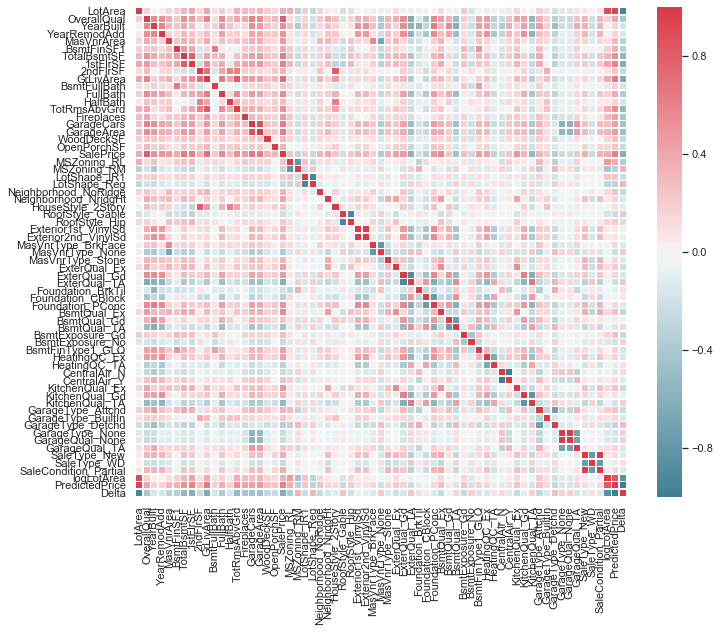

In [35]:
corr=df1.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": 1})